In [30]:
#import necessary libraries for the program
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
#Load the data and split it into feature variable and target variable
data = pd.read_csv('wine.csv', delimiter=',')
y = data.iloc[:, 0]
X =data.iloc[:, 1:]
X.describe()
#the original dataset has 13 features as seen below

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
#split the data into training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)

In [33]:
#Fit the LDA model on the training data and set the final reduced number of features to be 2
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [34]:
#Reducing the 13 features to 2 features
X_reduced=lda.transform(X)

#The X_reduced feature only has two features as shown below    
X_reduced[:5,:]

array([[-5.40944408,  1.61438995],
       [-4.90243969,  1.17493343],
       [-4.014012  ,  1.22643116],
       [-4.94831045,  3.60101959],
       [-1.75810849,  0.34503493]])

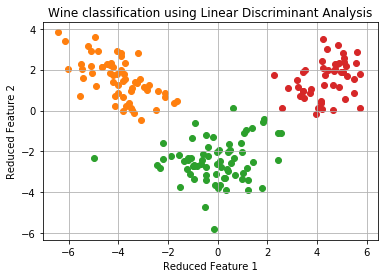

In [35]:
#plot the model using the reduced number of features
def plot_lda(X):

    for label in range(4):
        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label])
    plt.xlabel('Reduced Feature 1')
    plt.ylabel('Reduced Feature 2')
    plt.title('Wine classification using Linear Discriminant Analysis') 
    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_lda(X_reduced)

In [36]:
#Make predictions for the testing dataset
predict=lda.predict(X_test)
print("Predicted Classes\n",predict)
print('\n')
print("Actual Classes\n",Y_test.ravel())

Predicted Classes
 [1 3 2 1 2 1 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]


Actual Classes
 [1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1 3
 2 2 3 1 1 2 2 2]


In [37]:
#Print the efficiency
print("Efficiency is ",accuracy_score(predict,Y_test)*100)

Efficiency is  97.77777777777777
